<a href="https://colab.research.google.com/github/Francisco-Italo/ml2023-Italo-Moraes/blob/master/Atividades/04-Decision-tree/Ativ_dt_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/titanic-train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/titanic-test.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

In [10]:
features = ["Pclass", "Sex", "Parch"]
X_train = pd.get_dummies(X_train[features])
X_train

,Pclass,Parch,Sex_female,Sex_male
0,3,0,0,1
1,1,0,1,0
2,3,0,1,0
3,1,0,1,0
4,3,0,0,1
...,...,...,...,...
886,2,0,0,1
887,1,0,1,0
888,3,2,1,0
889,1,0,0,1


In [11]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.125, 0.375, 'x[1] <= 1.5\ngini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.0625, 0.125, 'gini = 0.457\nsamples = 113\nvalue = [73, 40]'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.375, 0.375, 'x[1] <= 0.5\ngini = 0.242\nsamples = 455\nvalue = [391, 64]'),
 Text(0.3125, 0.125, 'gini = 0.202\nsamples = 385\nvalue = [341, 44]'),
 Text(0.4375, 0.125, 'gini = 0.408\nsamples = 70\nvalue = [50, 20]'),
 Text(0.75, 0.625, 'x[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.625, 0.375, 'x[0] <= 1.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.5625, 0.125, 'gini = 0.062\nsamples = 94\nvalue = [3, 91]'),
 Text(0.6875, 0.125, 'gini = 0.145\nsamples = 76\nvalue = [6, 70]'),
 Text(0.875, 0.375, 'x[1] <= 1.5\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Te

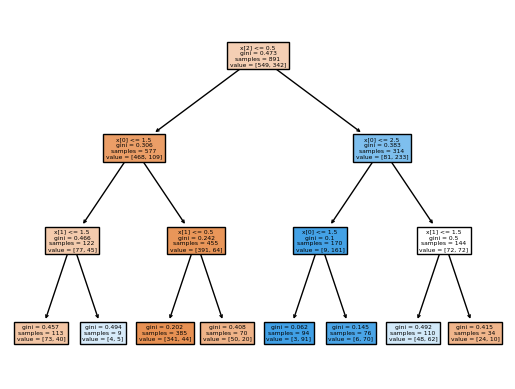

In [13]:
tree.plot_tree(dt, filled=True)

[0.23812248 0.04565796 0.71621955 0.        ]


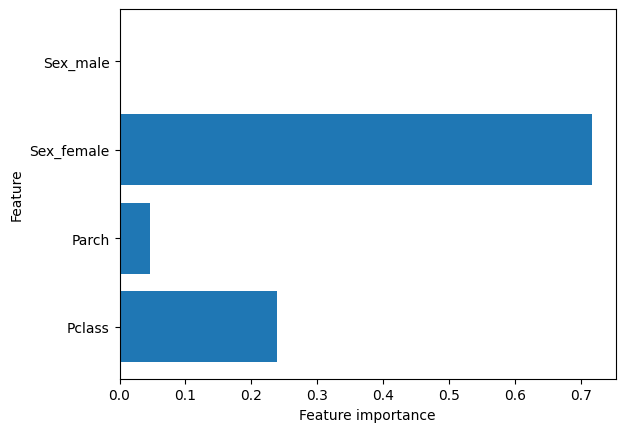

In [14]:
import numpy as np
import matplotlib.pyplot as plt

relevance = dt.feature_importances_
feature_labels = X_train.columns.tolist()

print(relevance)

plt.barh(np.arange(len(relevance)), relevance)
plt.yticks(np.arange(len(relevance)), feature_labels)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [17]:
X_test = pd.get_dummies(df_test[features])

In [18]:
pred = dt.predict(X_test)

In [19]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': pred})
output.to_csv('submission.csv', index=False)

In [20]:
df_sub = pd.read_csv('submission.csv')

In [21]:
df_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
